# Part 1 missing data


## 1
### import the usual modules for loading csv data, manipulating it, and plotting it

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 2
### read the 'preprocessing_sample_data_missing_vals_new.csv' file into a pandas DataFrame, and print out the column (feature) names and a few rows. Note that the first column of the data file is the row index, so you'll need to pass the optional index_col argument.


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/machinelearning_dataset/preprocessing_sample_data_missing_vals_new.csv', index_col=0)
#index_col=0: use the first line for header

print(dataset.columns)
print(dataset.head())
print(len(dataset))

Index(['weight_kg', 'overall_length_mm', 'variety', 'avg_rating'], dtype='object')
   weight_kg  overall_length_mm  variety  avg_rating
0        NaN         291.068237        1  216.921532
1   0.008966         178.648431        1  314.967587
2   0.003654                NaN        1  178.361162
3        NaN         130.146299        0  476.198690
4   0.005907                NaN        0  380.775044
100


## 3
### Use train_test_split to split the entire data frame (do not separate it into features and target columns) into 75% training and 25% testing data. As before, be sure to set the np.random.seed(5) in the same cell but before the call to train_test_split so the results of the split are reproducible with what I expect.


In [ ]:
np.random.seed(5)

from sklearn.model_selection import train_test_split

all_data = dataset.iloc[0:100]
print('all_data shape', all_data.shape)

dataset_fit, dataset_test = train_test_split(all_data, test_size = 0.25)
print("dataset_fit type", type(dataset_fit))
print("fit data shape", dataset_fit.shape, "test", dataset_test.shape)

all_data shape (100, 4)
dataset_fit type <class 'pandas.core.frame.DataFrame'>
fit data shape (75, 4) test (25, 4)


## 4
### Create two DataFrames that omit all rows that have at least one missing value, one for the fitting and one for the testing data that you created in step 3.  Use the DataFrame.dropna() method.  Check out the documentation to make sure that you're passing any optional arguments necessary so that it drops any row that has any missing values.  Print the length of the dataframes and also confirm that no columns were lost.  Create a text cell and say how many rows were lost from each.


In [ ]:
fit_drop = dataset_fit.dropna()
test_drop = dataset_test.dropna()
# drop missing data rows for fitting and testing

print('fit drop', len(fit_drop))
print('test drop', len(test_drop))
print(fit_drop.columns)
print(test_drop.columns)

fit drop 46
test drop 12
Index(['weight_kg', 'overall_length_mm', 'variety', 'avg_rating'], dtype='object')
Index(['weight_kg', 'overall_length_mm', 'variety', 'avg_rating'], dtype='object')


75-46=29 rows got omitted from fitting dataframe, 25-12=13 rows got omitted from testing dataframe. I have looked into the documentation and counted the number of rows with missing data. The total number of rows missing is 42, which matches the sum of missing rows from both fitting and testing (29+13=42).

## 5
### The 'variety' column is categorical, with values of 0, 1, or 2.
#### a) Use the pandas df['col'].unique() method to determine what values are actually present in the variety column of each of the 4 data sets (original and dropped, fitting and testing), and print them.  Confirm that they are all the same.


In [ ]:
fitting_unique = dataset_fit['variety'].unique()
print("Unique values in undropped fitting", fitting_unique)
#unique value in variety column from undropped & splitted fitting data

testing_unique = dataset_test['variety'].unique()
print("Unique values in undropped testing", testing_unique)
#unique value in variety column from undropped & splitted testing data

fitting_drop_unique = fit_drop['variety'].unique()
print("Unique values in dropped fitting", fitting_drop_unique)
#unique value in variety column from dropped & splitted fitting data

testing_drop_unique = test_drop['variety'].unique()
print("Unique values in dropped testing", testing_drop_unique)
#unique value in variety column from dropped &b splitted testing data

Unique values in undropped fitting [2 1 0]
Unique values in undropped testing [2 0 1]
Unique values in dropped fitting [2 1 0]
Unique values in dropped testing [2 0 1]


The unique values are consistent across all data sets, indicating that no new unique values were introduced or existing ones removed during the dropping of rows with missing values.

b) Use a pandas function to create another 4 corresponding data frames where that categorical column has been replaced with one-hot encoding features.


In [ ]:
undropped_fitting_onehot = pd.get_dummies(dataset_fit, columns=['variety'])
print(undropped_fitting_onehot.shape)
print(undropped_fitting_onehot.head())
# one hot for undropped splitted fitting data

undropped_testing_onehot = pd.get_dummies(dataset_test, columns=['variety'])
print(undropped_testing_onehot.shape)
print(undropped_testing_onehot.head())
# one hot for undropped splitted testing data

dropped_fitting_onehot = pd.get_dummies(fit_drop, columns=['variety'])
print(dropped_fitting_onehot.shape)
print(dropped_fitting_onehot.head())
# one hot for dropped splitted fitting data

dropped_testing_onehot = pd.get_dummies(test_drop, columns=['variety'])
print(dropped_testing_onehot.shape)
print(dropped_testing_onehot.head())
# one hot for dropped splitted testing data



(75, 6)
    weight_kg  overall_length_mm  avg_rating  variety_0  variety_1  variety_2
13   0.003266         253.067572  256.973548          0          0          1
63   0.009301         281.997703  388.025027          0          0          1
71   0.003509                NaN  159.669152          0          1          0
55   0.004010          87.544094  195.644470          0          1          0
87   0.009689         201.827132  307.771032          0          1          0
(25, 6)
    weight_kg  overall_length_mm  avg_rating  variety_0  variety_1  variety_2
66   0.004888         237.357630  284.407527          0          0          1
32   0.007599         224.916461  471.383841          1          0          0
46        NaN         125.937040  321.987712          0          1          0
28   0.009682                NaN  305.459779          0          1          0
74   0.008361         195.308378  254.062708          0          1          0
(46, 6)
    weight_kg  overall_length_mm  avg_ra

## 6
### Create an sklearn pipeline that imputes missing values by replacing them with their median, standardize the resulting values, and does a Ridge fit.  Use the pipeline to fit the 'avg_rating' column as a function of all feature columns for the original data set that has missing values (and the categorical feature one-hot encoded). You will need to split your data frame into separate features and target arrays for this fit (as in the previous homework).


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

x = all_data.drop('avg_rating', axis=1)
y = all_data['avg_rating']
# Split data into features and target

np.random.seed(5)
# make run reproducible

fit_x, test_x, fit_y, test_y = train_test_split(x, y, test_size=0.25)
# Split data into training and testing sets


fit_x_onehot = pd.get_dummies(fit_x, columns=['variety'])
test_x_onehot = pd.get_dummies(test_x, columns=['variety'])
# Perform one-hot separately on training and testing

pp = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), Ridge(alpha=0.01))
pp.fit(fit_x_onehot, fit_y)
# Define and fit the pipeline

print('score', pp.score(test_x_onehot, test_y))

score 0.8273268578141104


Doubt: Are there any differences to do get_dummies before and after split considering the catagorical columns have the same values on all 4 data sets?

## 7
### Create another equivalent pipeline and use it to fit the fitting data frame that had the missing-feature rows removed and categorical values encoded with one-hot (in step 5)

In [ ]:
fit_x_drop = dropped_fitting_onehot.drop('avg_rating', axis=1)
fit_y_drop = dropped_fitting_onehot['avg_rating']

test_x_drop = dropped_testing_onehot.drop('avg_rating', axis=1)
test_y_drop = dropped_testing_onehot['avg_rating']
#define target and features

pp = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), Ridge(alpha=0.01))
pp.fit(fit_x_drop, fit_y_drop)
# Define and fit the pipeline

print('score', pp.score(test_x_drop, test_y_drop))

score 0.9310107520336671


## 8
### Make a scatterplot of the actual avg_rating vs. predicted rating from both pipelines using the corresponding testing data. Create a text cell and discuss whether there are differences between the fits of the data with imputed values vs. data with rows removed.  Explain under what circumstances you think the results would have a large difference.


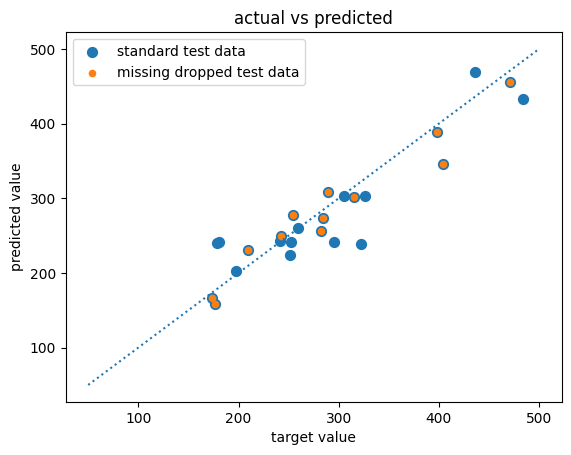

In [ ]:
fig, ax = plt.subplots()
ax.scatter(test_y, pp.predict(test_x_onehot), label='standard test data', s=50, c='C0')
ax.scatter(test_y_drop, pp.predict(test_x_drop), label='missing dropped test data', s=20, c='C1')
ax.plot([50,500],[50,500], ':')
ax.set_xlabel("target value")
ax.set_ylabel("predicted value")
ax.set_title('actual vs predicted')
ax.legend()
plt.show()

The data points of removed-row overlaps with those of original data.  
If rows with missing values are systematically different from the rest of the data, removing them may introduce bias and cuasing difference in scatterplot.

# Part 2 k-NN vs. mean imputer


## 1
### Repeat Part 1 steps 1-2 (import modules, read data) on the 'preprocessing_sample_data_missing_vals_alt.csv' file, but give the variable containing the DataFrame different names than in Part 1.  Note that there is no categorical data in this dataset.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_2 = pd.read_csv('/content/drive/MyDrive/machinelearning_dataset/preprocessing_sample_data_missing_vals_alt.csv', index_col=0)
#index_col=0: use the first line for header

print(dataset_2.columns)
print(dataset_2.head())
print(len(dataset_2))

Index(['weight_kg', 'overall_length_mm', 'price', 'avg_rating'], dtype='object')
   weight_kg  overall_length_mm      price  avg_rating
0   3.143428           1.490927   2.895001    6.400798
1  10.237233           9.644184   9.635325   30.665897
2  10.547104          11.105189        NaN   36.543178
3  10.655396          10.214400        NaN   33.211331
4   9.180312                NaN  12.319402   30.861946
400


## 2
### Plot histograms (in 3 separate panels) of the values of the 3 features.


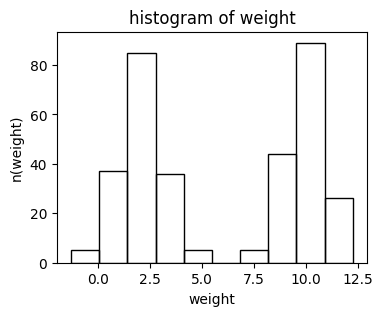

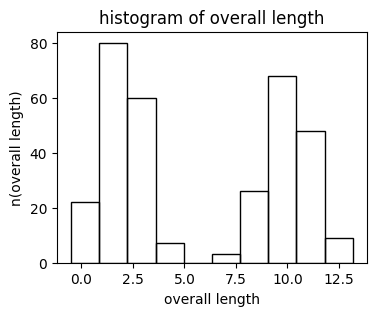

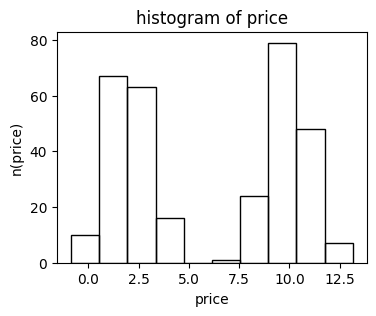

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(dataset_2['weight_kg'].values, bins='auto', fill=False)
ax.set_title('histogram of weight')
ax.set_xlabel('weight')
ax.set_ylabel('n(weight)')
fig.show()

fig, ax = plt.subplots(figsize=(4,3))
ax.hist(dataset_2['overall_length_mm'].values, bins='auto', fill=False)
ax.set_title('histogram of overall length')
ax.set_xlabel('overall length')
ax.set_ylabel('n(overall length)')
fig.show()


fig, ax = plt.subplots(figsize=(4,3))
ax.hist(dataset_2['price'].values, bins='auto', fill=False)
ax.set_title('histogram of price')
ax.set_xlabel('price')
ax.set_ylabel('n(price)')
fig.show()

## 3
### Use train_test_split to split the entire data frame into 75% training and 25% testing data. As before, be sure to set the np.random.seed(5) in the same cell but before the call to train_test_split.


In [ ]:
np.random.seed(5)

from sklearn.model_selection import train_test_split

dataset2_fit, dataset2_test = train_test_split(dataset_2, test_size = 0.25)
print("dataset2_fit type", type(dataset2_fit))
print("fit data shape", dataset2_fit.shape, "test", dataset2_test.shape)

dataset2_fit type <class 'pandas.core.frame.DataFrame'>
fit data shape (300, 4) test (100, 4)


## 4
### Create two sklearn pipelines that standardize the features, impute missing values, and do a Ridge fit.  One pipeline should impute the mean (note: not the median in this part). The other should use k-nearest neighbors (with the default value of k=5). Use the pipelines to fit the 'avg_rating' column as a function of all feature columns. As always, you will need to split your data frame into separate features and target arrays for this fit.


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

dataset2_fit_x = dataset2_fit.drop('avg_rating', axis=1)
dataset2_fit_y = dataset2_fit['avg_rating']

dataset2_test_x = dataset2_test.drop('avg_rating', axis=1)
dataset2_test_y = dataset2_test['avg_rating']
# Split data into features and target

pp2 = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), Ridge(alpha=0.01))
pp2.fit(dataset2_fit_x, dataset2_fit_y)
# Define and fit the pipeline of imputing the mean

pp3 = make_pipeline(KNNImputer(), StandardScaler(), Ridge(alpha=0.01))
pp3.fit(dataset2_fit_x, dataset2_fit_y)
# Define and fit the pipeline of imputing the KNN

Pipeline(steps=[('knnimputer', KNNImputer()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.01))])

## 5
### Print the scores of the two models on the testing data. Make a scatterplot of the actual avg_rating vs. predicted rating from both pipelines using the testing data. Create a text cell and discuss the differences between the fits of the data with the two imputing strategies. Explain why you think one approach worked better for this data (hint - look at the histograms from step 2).


score 0.8793927477274321
score 0.9300514180958818


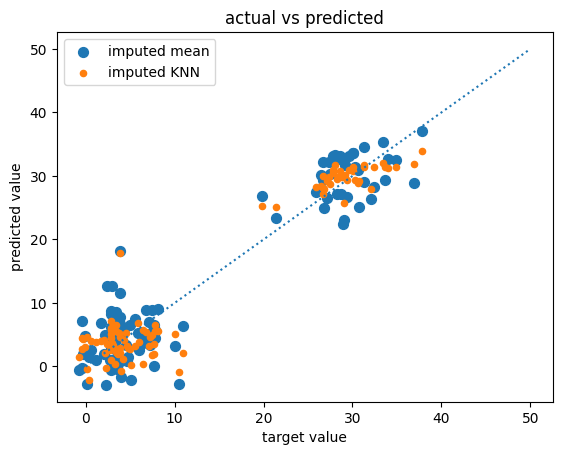

In [ ]:
print('score', pp2.score(dataset2_test_x, dataset2_test_y))
print('score', pp3.score(dataset2_test_x, dataset2_test_y))

fig, ax = plt.subplots()
ax.scatter(dataset2_test_y, pp2.predict(dataset2_test_x), label='imputed mean', s=50, c='C0')
ax.scatter(dataset2_test_y, pp3.predict(dataset2_test_x), label='imputed KNN', s=20, c='C1')
ax.plot([0,50],[0,50], ':')
ax.set_xlabel("target value")
ax.set_ylabel("predicted value")
ax.set_title('actual vs predicted')
ax.legend()
plt.show()

KNN is better for this data. The score of KNN is higher than imputed mean;and according to the histogram, there are two peaks in every histogram. If we impute the mean, the average does not represent the data well because it might vary the origional distribution and introduce bias.